This is my final project.
The goal is to take a table of data on a lot of contrys and use it to predict a countrys co2 output at a given time. 


In [156]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
DF = pd.read_csv("energy.csv")
DF.head(7)


,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000
5,5,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,1.335650e+04,1.990283,0.000,NaN


So im going to creat a model that takes the Energg type, year, gdp population and trys to predict the Energy consumption. 

In [157]:
tolist = DF.shape
DFlist = list(tolist)
print(DFlist)
rowsofdata = DFlist[0]
print(type(rowsofdata))

[55440, 11]
<class 'int'>


In [158]:
#cleaning data as we only need some data

CDF = DF[["Country", "Energy_type","Year",	"Energy_consumption",	"GDP",	"Population"]]

#removing all non genral energy types
CDF = CDF[(CDF['Energy_type'] == 'all_energy_types')]
#removing all rows with "NaN"

CDF.head(rowsofdata)


,Country,Energy_type,Year,Energy_consumption,GDP,Population
0,World,all_energy_types,1980,292.899790,27770.910281,4.298127e+06
6,Afghanistan,all_energy_types,1980,0.026583,NaN,1.335650e+04
12,Albania,all_energy_types,1980,0.162982,NaN,2.682700e+03
18,Algeria,all_energy_types,1980,0.780695,NaN,1.922170e+04
24,American Samoa,all_energy_types,1980,0.005893,NaN,3.264600e+01
...,...,...,...,...,...,...
55410,Wake Island,all_energy_types,2019,0.019436,NaN,NaN
55416,Western Sahara,all_energy_types,2019,0.003712,NaN,NaN
55422,Yemen,all_energy_types,2019,0.159020,53.083800,2.916220e+04
55428,Zambia,all_energy_types,2019,0.207097,247.181900,1.787385e+04


So now we have taken ought all the data that is about spisific energy types, and all the data that has a null value
Next im removing the column Energyt type

In [159]:
ToDropDF = CDF[["Year",	"Energy_consumption",	"GDP",	"Population"]]


In [160]:
FinalDF = ToDropDF.dropna()


In [161]:
FinalDFX = FinalDF[["Year","GDP","Population"]]
FinalDFy = FinalDF[["Energy_consumption"]]

In [162]:
msk = np.random.rand(len(FinalDF)) < 0.8
trainX = FinalDFX[msk]
testX = FinalDFX[~msk]
trainy = FinalDFy[msk]
testy = FinalDFy[~msk]


In [163]:
# Standardize the features and target variable
SScalX = StandardScaler()
#you NEED a difrent scale for the x and y 
SScaly = StandardScaler()

trainX = SScalX.fit_transform(trainX)
testX = SScalX.transform(testX)
#messing w the dementions 
trainy = SScaly.fit_transform(trainy.values.reshape(-1, 1))
testy = SScaly.transform(testy.values.reshape(-1, 1))

In [164]:


regr = linear_model.LinearRegression()



In [165]:
#fit the data

regr.fit (trainX, trainy)
# The coefficients
coefficients = regr.coef_
print ('Coefficients: ', coefficients)
YearCo = coefficients[0][0]
print(YearCo)
GDPCo = coefficients[0][1]

print(GDPCo)
PopulationCo = float(coefficients[0][2])
print(PopulationCo)
#the y intercept 
intercept = regr.intercept_
print('Intercept:',intercept)


Coefficients:  [[-0.00989266  0.63538377  0.36636941]]
-0.009892663275873204
0.6353837674822833
0.36636940611574054
Intercept: [-1.51694085e-17]


Scoring it

In [166]:

#We are predicting for both so we can see in sample and out of sample(the testing data). 
yHatTrain = regr.predict(trainX)
yHatTest = regr.predict(testX)

# now we have to un Scale it to get the numbers back to where they are meaningfull 
trainyPred = SScaly.inverse_transform(yHatTrain)
testyPred = SScaly.inverse_transform(yHatTest)

#we have to do this to the known data too because it was also scaled for the sake of Scaling 
trainyOrig = SScaly.inverse_transform(trainy)
testyOrig = SScaly.inverse_transform(testy)



now lets see how good our model is!

In [167]:
#Geting MSE for in sample and out of smaple 
mseTrain = mean_squared_error(trainyOrig, trainyPred)
mseTest = mean_squared_error(testyOrig , testyPred)
#same thing for R^2
r2Train = r2_score(trainyOrig,trainyPred)
r2Test = r2_score(testyOrig, testyPred)

print("MSE within the train set:", mseTrain)
print("MSE with in the test set:", mseTest)
print("Train R^2 Score:", r2Train)
print("Test R^2 Score:", r2Test)

MSE within the train set: 25.16686221041884
MSE with in the test set: 36.04238395140192
Train R^2 Score: 0.9774754956115645
Test R^2 Score: 0.9778773361074969


Now lets plot insample acuracy VS out of sample acuracy 

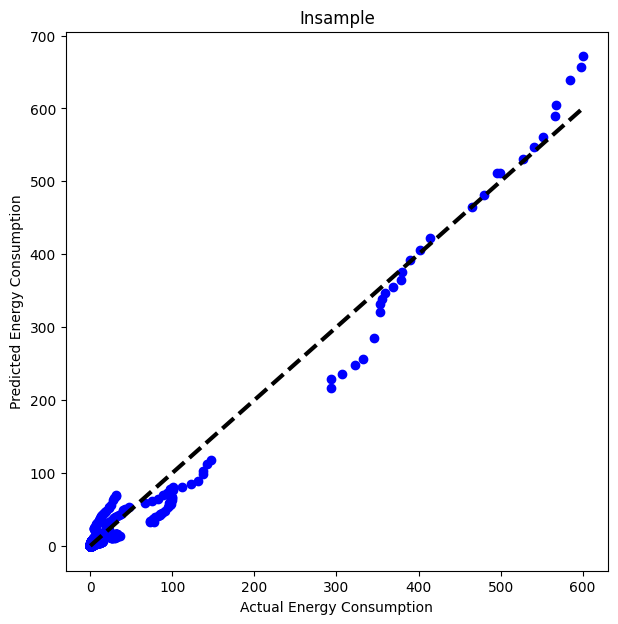

In [168]:
# Plotting the results
plt.figure(figsize=(7,7))

# Plotting insample results
plt.scatter(trainyOrig, trainyPred, color='blue')
#k-- makes for a pretter dashed line
plt.plot([trainyOrig.min(), trainyOrig.max()], [trainyOrig.min(), trainyOrig.max()], 'k--', lw=3)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Insample')


plt.show()


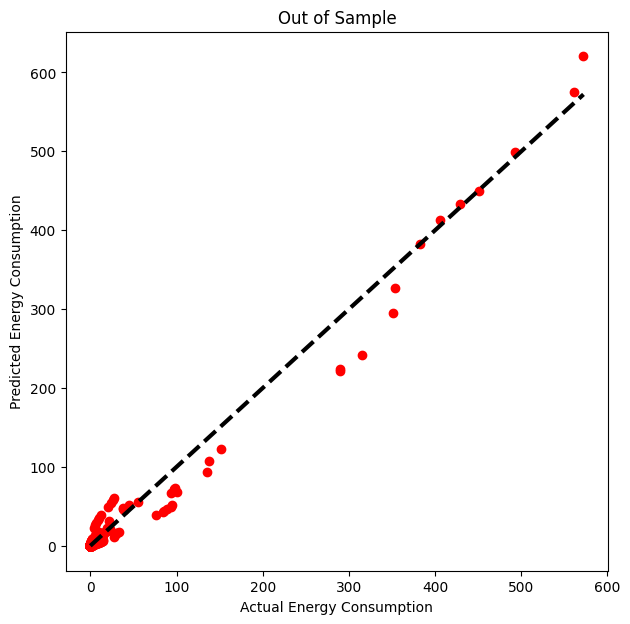

In [169]:
plt.figure(figsize=(7, 7))

# Plotting out of sample results
plt.scatter(testyOrig, testyPred, color='red')
plt.plot([testyOrig.min(), testyOrig.max()], [testyOrig.min(), testyOrig.max()], 'k--', lw=3)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Out of Sample')


plt.show()


In [170]:
# Function to predict energy consumption based on user input
def predict_energy_consumption(year, gdp, population):
    # Prepare the input data
    input_data = np.array([[year, gdp, population]])
   
    input_data_scaled = SScalX.transform(input_data)
    
    # Make prediction
    prediction_scaled = regr.predict(input_data_scaled)
    prediction = SScaly.inverse_transform(prediction_scaled)
    
    return prediction[0][0]

# User input for new data
year_input = float(input("Enter the year: "))
gdp_input = float(input("Enter the GDP: "))
population_input = float(input("Enter the population: "))

# Predict energy consumption based on user input
predicted_energy = predict_energy_consumption(year_input, gdp_input, population_input)
print("Predicted Energy Consumption is:",predicted_energy, "Quads")

Predicted Energy Consumption is: 59.44951999356394 Quads


C:\Users\kaica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


United States,all_energy_types,
year  = 1,
consumption  = 78.0211

gdp = 7080.75,
pop  = 227119000,

so now we have to know how to use the model. 
